In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
What_country = 'United States'
df_DA_IN = df[((df['job_country']== What_country))].copy()
job_titles = df_DA_IN['job_title_short'].value_counts().head(6).index.to_list()
df_DA_top6 = df_DA_IN[df_DA_IN['job_title_short'].isin(job_titles)]
df_DA_top6 = df_DA_top6.dropna(subset=['salary_year_avg'])
order_top6 = df_DA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

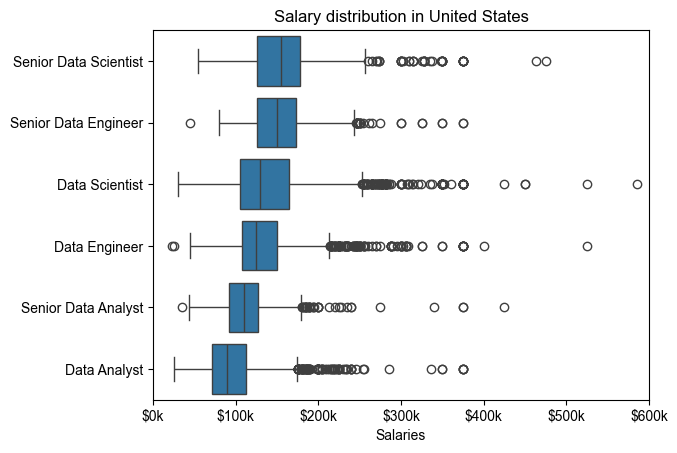

In [3]:
sns.boxplot(df_DA_top6,x='salary_year_avg',y='job_title_short',order=order_top6)
sns.set_theme(style='ticks')

plt.title(f'Salary distribution in {What_country}')
plt.ylabel('')
plt.xlim(0,600_000)
plt.xlabel('Salaries')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
